# Processing and analyzing expenses for loans provided by the Social Development Bank

In [1]:
# import librarys 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')


from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
dataCsv= pd.read_csv('project_data.csv',encoding = 'utf-8') # read data as csv

In [3]:
dataCsv.head() #previews data

ID      المدينة التصنيف          االمنتج قطاع_العميل  مبلغ_التمويل  \
0   1         حائل   مشروع  قرض مشروع ناشيء    غير معرف       30000.0   
1   2       الطائف     نقل   قرض سيارة أجرة    غير معرف       54694.0   
2   8       الرياض   مشروع       قرض التميز    قطاع خاص     1585000.0   
3  12  مكه المكرمه     نقل    قرض أجرة خاصة  قطاع حكومي       97230.0   
4  13        جازان     نقل    قرض أجرة خاصة  قطاع حكومي       97230.0   

  قيمة_القسط تاريخ_الصرف جنس_العميل عمرالعميل ألحاله_الإجتماعية إحتياجات_خاصة  \
0      <1000      2021/1        ذكر     >= 30             متزوج          سليم   
1      <1000      2021/1        ذكر     >= 30             متزوج          سليم   
2     >=1000      2021/1       أنثى     >= 40              أعزب          سليم   
3     >=1000      2021/1        ذكر     >= 40             متزوج          سليم   
4     >=1000      2021/1        ذكر      < 30              أعزب          سليم   

  عدد افراد الاسرة قيمة الدخل  
0        غير معروف      <5000  
1            >= 02      <5000  
2             < 02    >=10000  
3             < 02      <5000  
4             < 02      <5000

In [4]:
data = dataCsv.copy() # get a copy 

In [5]:
da_col = data.columns # get columns 

In [6]:
data.dtypes # show types of features (variables)

ID                     int64
المدينة               object
التصنيف               object
االمنتج               object
قطاع_العميل           object
مبلغ_التمويل         float64
قيمة_القسط            object
تاريخ_الصرف           object
جنس_العميل            object
عمرالعميل             object
ألحاله_الإجتماعية     object
إحتياجات_خاصة         object
عدد افراد الاسرة      object
قيمة الدخل            object
dtype: object

In [7]:
data.shape # show dim. (rows, cols)

(55129, 14)

In [8]:
data.drop(['ID','تاريخ_الصرف','االمنتج'],axis= 1, inplace= True) # remove  2 columns 

In [9]:
data.rename (columns= {'المدينة':'Region', 'التصنيف':'class', 'قطاع_العميل': 'customer_sector', 'مبلغ_التمويل':'supply_amount',
            'قيمة_القسط':'payment_value','جنس_العميل':'gender', 'عمرالعميل':'age','ألحاله_الإجتماعية':'status',
                     'إحتياجات_خاصة':'special_needs', 'عدد افراد الاسرة':'No_of_members_family', 'قيمة الدخل' :'income_value'}, inplace= True)

## Exploratory Data Analysis

In [10]:
data.info() # get information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55129 entries, 0 to 55128
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Region                55129 non-null  object 
 1   class                 55129 non-null  object 
 2   customer_sector       55129 non-null  object 
 3   supply_amount         55129 non-null  float64
 4   payment_value         55129 non-null  object 
 5   gender                55091 non-null  object 
 6   age                   55129 non-null  object 
 7   status                55079 non-null  object 
 8   special_needs         55079 non-null  object 
 9   No_of_members_family  55129 non-null  object 
 10  income_value          55091 non-null  object 
dtypes: float64(1), object(10)
memory usage: 4.6+ MB


In [11]:
data.describe().round(2) # get descriptive stats. 
# remark .describe() work and present descriptive stats with (int, float) features 
###  it only has  supply amount as float type

supply_amount
count       55129.00
mean        62014.57
std        145252.90
min         18000.00
25%         42000.00
50%         60000.00
75%         60000.00
max      10000000.00

In [12]:
data['class'].value_counts()  #count class

إجتماعي    29875
حر         22996
مشروع       2132
نقل          126
Name: class, dtype: int64

In [13]:
data['class'] = data['class'].map({'نقل':'transport', 'مشروع':'project', 'حر':'freelancer',
                                 'إجتماعي':'socially' }) # rename 

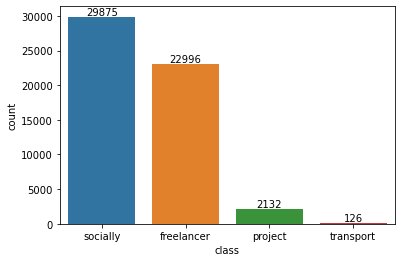

In [14]:
 ax = sns.countplot(x = 'class', data= data,
    order = data['class'].value_counts(ascending = False).index); # to display countplot of class of class

abs_values = data['class'].value_counts(ascending=False).values

ax.bar_label(container= ax.containers[0], labels = abs_values) # show  above each bar label of value

plt.show()                                   # show plt
#plt.savefig()  # to save bar plot 

In [15]:
data.customer_sector.value_counts() # count customer_sector

غير معرف          25713
قطاع حكومي        17408
قطاع خاص           7811
متقاعد             3604
شركة حكومية         474
متقاعد تأمينات      117
سجل تجاري             2
Name: customer_sector, dtype: int64

In [16]:
# replace to public sector
data['customer_sector'] = data['customer_sector'].replace(['شركة حكومية','قطاع حكومي'],'public sector');

# replace to retired
data.customer_sector= data['customer_sector'].replace(['متقاعد تأمينات','متقاعد'],'retired')


In [17]:
# replace parvite sector
data.customer_sector= data['customer_sector'].replace('قطاع خاص','pravite sector');

# replace to commerical record
data.customer_sector= data['customer_sector'].replace('سجل تجاري','commerical record');

# replace to null value
data.customer_sector= data['customer_sector'].replace('غير معرف',np.nan)



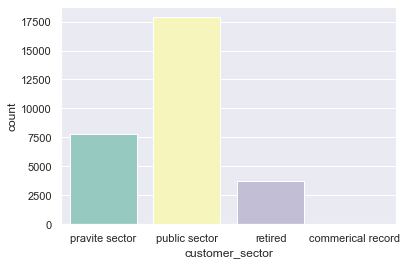

In [18]:
sns.set_theme(style= 'darkgrid') # set  style of background figure

sns.countplot(x = 'customer_sector', palette = 'Set3', data = data) # show count plot of customer sector along x axis

plt.show()  # show plt 

In [19]:
data.payment_value.value_counts() # to get count of payment value 

>=1000    39329
<1000     15800
Name: payment_value, dtype: int64

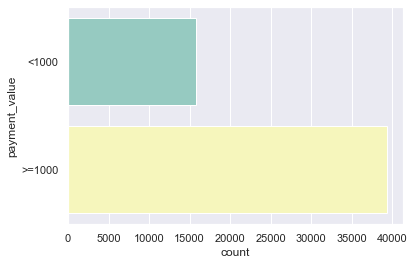

In [20]:
sns.set_theme(style= 'darkgrid') # set  style of background figure

sns.countplot(y = 'payment_value', palette = 'Set3', data = data) # show count plot of payment value along y axis

plt.show()  # show plt
#plt.savefig()  # to save bar plot 

In [21]:
# replace 'gender' == 'ذكر' to 'male ' , other to 'female'
data.gender = np.where(data['gender'] == 'ذكر','male','female') 

In [22]:
data.gender.value_counts() # count of gender 

male      33455
female    21674
Name: gender, dtype: int64

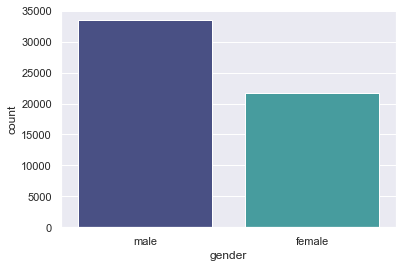

In [23]:
sns.set_theme(style= 'darkgrid') # set  style of background figure

sns.countplot(x = 'gender', palette = 'mako', data = data) # show count plot of gender along x axis

plt.show()  # show plt
#plt.savefig()  # to save bar plot 

In [24]:
# replace status 
data['status'] = data['status'].map({'متزوج':'married', 'أعزب':'single',
                'مطلق':'divorced','أرمل':'widower', 'مهجورة':'deserted'})

In [25]:
data.status.value_counts() # count of status

married     42615
single       7997
divorced     2928
widower      1504
deserted       35
Name: status, dtype: int64

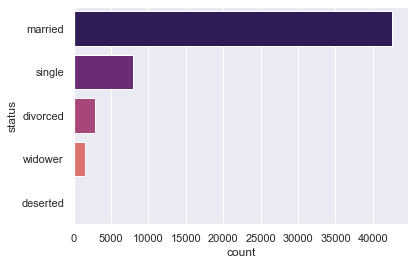

In [26]:
sns.set_theme(style= 'darkgrid') # set  style of background figure

sns.countplot(y= 'status', palette = 'magma', data = data) # count plot fot status along y axis 

plt.show()  # show plot 

In [27]:
data.special_needs.value_counts() # count of special_needs

سليم                     52929
ذوي الاحتياجات الخاصة     2150
Name: special_needs, dtype: int64

In [28]:
# replace spcial needs to 'no' if 'special_needs' == ' سليم'

data.special_needs = np.where(data['special_needs'] == 'سليم', 'no', 'yes')

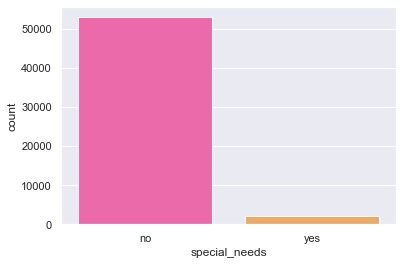

In [29]:
sns.set_theme(style= 'darkgrid')

# count plot fot status along x axis
sns.countplot( x = 'special_needs' ,data = data, palette= 'spring')
 

plt.show()

In [30]:
data['age'].value_counts() # count of age

< 30        21098
>= 30       19705
>= 40       13411
>= 60         768
غير معرف      147
Name: age, dtype: int64

In [31]:
# replace 'غير معرف' to nan
data['age'] = data['age'].replace('غير معرف', np.nan)

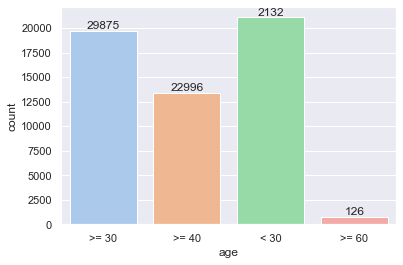

In [32]:
sns.set_theme(style= 'darkgrid')

# count plot fot age along x axis 
ax = sns.countplot( x = 'age' ,data = data, palette= 'pastel') 

# to display a label above each bar 
ax.bar_label(container= ax.containers[0], labels = abs_values)


plt.show()

In [33]:
data['No_of_members_family'].value_counts() # count of no. of members of family 

غير معروف    23119
>= 02        18081
>= 05         8763
< 02          3691
>= 10         1475
Name: No_of_members_family, dtype: int64

In [34]:
# replace to 'غير معرف' to nan 
data.No_of_members_family= data['No_of_members_family'].replace('غير معروف',np.nan)

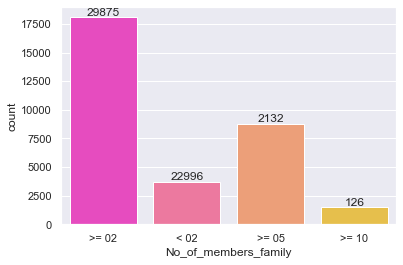

In [35]:
sns.set_theme(style= 'darkgrid')

# count plot fot no. members of fmaily  along x axis 
ax = sns.countplot( x = 'No_of_members_family' ,data = data, palette= 'spring') 

# to display a label above each bar 
ax.bar_label(container= ax.containers[0], labels = abs_values)


plt.show()

In [36]:
data.income_value.value_counts() # count of income value

<5000      38476
>=5000      7804
>=7500      4944
>=10000     3867
Name: income_value, dtype: int64

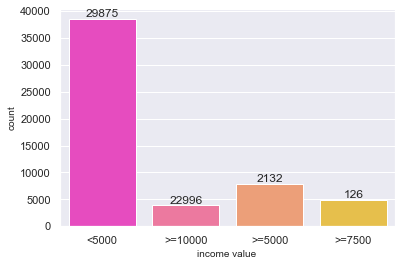

In [37]:
sns.set_theme(style= 'darkgrid')

# count plot fot income value along x axis 
ax = sns.countplot( x = 'income_value' ,data = data, palette= 'spring')

# to display a label above each bar
ax.bar_label(container= ax.containers[0], labels = abs_values)

plt.xlabel('income value ', fontsize=10) # show xlabel
plt.ylabel('count', fontsize=10)  # show ylabel
plt.show()

In [38]:
data.Region.value_counts() # count of Region 

الرياض             8277
جده                4512
مكه المكرمه        4200
خميس  مشيط         3894
المدينه المنوره    3881
جازان              3864
الدمام             3208
الطائف             3094
تبوك               2482
الأحساء            1899
بريده              1620
ينبع               1295
الباحه             1188
حائل               1148
الدوادمي           1132
حفر الباطن         1082
القنفذه            1074
نجران              1073
الخرج               847
عرعر                787
الرس                782
الجوف               766
القريات             722
بيشه                709
النماص              579
المجمعه             537
وادى الدواسر        477
Name: Region, dtype: int64

In [39]:
# replace Region 

data['Region'] = data['Region'].replace(['القنفذه','جده','مكه المكرمه','الطائف'],'Makkah'); #  replace & combine (string) to Makkah 

#  replace & combine (string) to Riyadh
data['Region'] = data['Region'].replace(['الخرج','الدوادمي','الرياض','المجمعه','وادى الدواسر'],'Riyadh'); 

data['Region'] = data['Region'].replace(['ينبع','المدينه المنوره'],'Medina');#  replace & combine (string) to Medina

data['Region'] = data['Region'].replace(['الرس','بريده'],'Buraydah'); #  replace & combine (string) to Buraydah

data['Region'] = data['Region'].replace(['الدمام','حفر الباطن','الأحساء'],'Eastren'); # replace & combine (string) to Eastren

data['Region'] = data['Region'].replace(['النماص','بيشه','خميس  مشيط'],'Aseer'); #  replace & combine (string) to Asser

data['Region'] = data['Region'].replace('نجران','Najran '); 


data['Region'] = data['Region'].replace('الباحه','Al Baha ');

data['Region'] = data['Region'].replace('جازان','jazan');

data['Region'] = data['Region'].replace(['القريات','الجوف'],'Al jouf');#  replace & combine (string) to Al jouf

data['Region'] = data['Region'].replace(['تبوك','حائل','عرعر'],['Tabouk','Hail','Northen'])

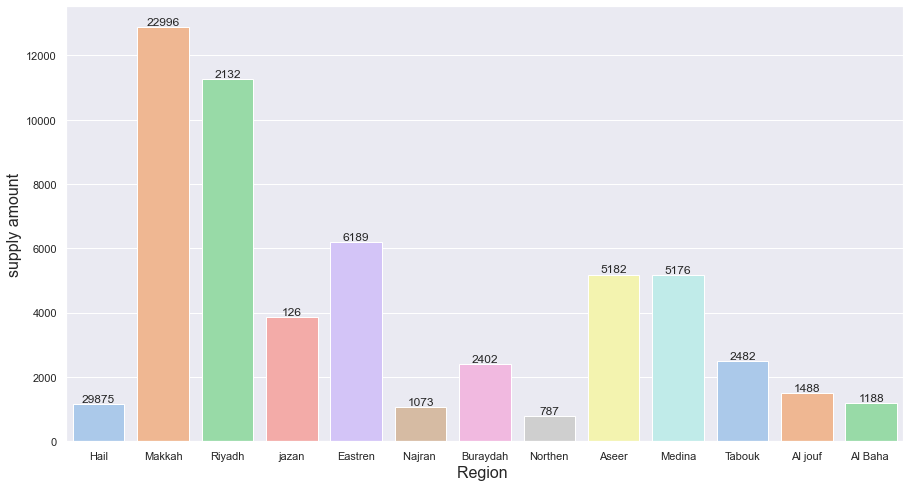

In [40]:
plt.figure(figsize=(15,8))  # size of figure (width, tall)

sns.set_theme(style= 'darkgrid') # set style of background 

# bring count plot for Region  x axis 
ax = sns.countplot( x = 'Region' ,data = data, palette= 'pastel') 

ax.bar_label(container= ax.containers[0], labels = abs_values) # get label above bars

plt.xlabel('Region ', fontsize=16) # show xlabel
plt.ylabel('supply amount', fontsize=16)  # show ylabel

plt.show() # show plot 


In [41]:
data.head() # repreview data after modify 

Region      class customer_sector  supply_amount payment_value  gender  \
0    Hail    project             NaN        30000.0         <1000    male   
1  Makkah  transport             NaN        54694.0         <1000    male   
2  Riyadh    project  pravite sector      1585000.0        >=1000  female   
3  Makkah  transport   public sector        97230.0        >=1000    male   
4   jazan  transport   public sector        97230.0        >=1000    male   

     age   status special_needs No_of_members_family income_value  
0  >= 30  married            no                  NaN        <5000  
1  >= 30  married            no                >= 02        <5000  
2  >= 40   single            no                 < 02      >=10000  
3  >= 40  married            no                 < 02        <5000  
4   < 30   single            no                 < 02        <5000

In [42]:
data.isnull().any() # check missing value  

# there are a missing values in customer true , status, No.of members family and income vlaue

Region                  False
class                   False
customer_sector          True
supply_amount           False
payment_value           False
gender                  False
age                      True
status                   True
special_needs           False
No_of_members_family     True
income_value             True
dtype: bool

In [43]:
data.isnull().sum() # check sum of null value 

# there  25713  nulll of obs. in customer sector
# there 50 null of obs. in status 
# there 23119 null of obs. in No of members family 
# there 38 null of obs. in income value 
# there 147 null of obs. in age

Region                      0
class                       0
customer_sector         25713
supply_amount               0
payment_value               0
gender                      0
age                       147
status                     50
special_needs               0
No_of_members_family    23119
income_value               38
dtype: int64

In [44]:
data.dropna(inplace= True)  # delete missing value 

In [45]:
data.isnull().any() # re check missing value 

Region                  False
class                   False
customer_sector         False
supply_amount           False
payment_value           False
gender                  False
age                     False
status                  False
special_needs           False
No_of_members_family    False
income_value            False
dtype: bool

In [46]:
data.info() # get infomartion 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23145 entries, 2 to 55122
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Region                23145 non-null  object 
 1   class                 23145 non-null  object 
 2   customer_sector       23145 non-null  object 
 3   supply_amount         23145 non-null  float64
 4   payment_value         23145 non-null  object 
 5   gender                23145 non-null  object 
 6   age                   23145 non-null  object 
 7   status                23145 non-null  object 
 8   special_needs         23145 non-null  object 
 9   No_of_members_family  23145 non-null  object 
 10  income_value          23145 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.1+ MB


In [47]:
# convert gender to numrical which 0 = male , 1 = female
data.gender = data.gender.map({'male':1, 'female':0})

In [48]:
# convert income to numrical  
data['income_value'] = data['income_value'].map({
    '<5000':0, '>=5000': 1, '>=7500':2, '>=10000':3
}) 

In [49]:
# conver age to numrical
data['age'] = data['age'].map({'< 30':0, '>= 30':1,'>= 40':2,'>= 60':3})

In [50]:
#convert paymet value to numriacl 
data.payment_value = data['payment_value'].map({'>=1000':1, '<1000':0})

In [51]:
# convert no. mebers family to numrical 
data.No_of_members_family = data['No_of_members_family'].map({'>= 02':1, '>= 05':2, '< 02':0, '>= 10':3})

In [52]:
# convert customer to numrical
data.customer_sector = data['customer_sector'].map({'pravite sector':2, 'public sector':1, 'retired':0, 'commerical record':3})

In [53]:
# convert class to numriacl 
data['class'] = data['class'].map({'transport':0, 'project':1, 'freelancer':2,
                                 'socially':3 })

In [54]:
# convert special needs to numriacl
data.special_needs = data['special_needs'].map( {'no':0, 'yes':1})

In [55]:
#convert status to numriacl
data['status'] = data['status'].map({'married':0, 'single':1,
                'divorced':2,'widower':3, 'deserted':4})

In [56]:
data.head() # view head 

Region  class  customer_sector  supply_amount  payment_value  gender  age  \
2  Riyadh      1                2      1585000.0              1       0    2   
3  Makkah      0                1        97230.0              1       1    2   
4   jazan      0                1        97230.0              1       1    0   
5  Makkah      0                1        97230.0              1       0    1   
6  Riyadh      1                1      1000000.0              1       1    2   

   status  special_needs  No_of_members_family  income_value  
2       1              0                     0             3  
3       0              0                     0             0  
4       1              0                     0             0  
5       2              0                     1             0  
6       0              0                     0             3

In [57]:
data.dtypes # check types of features

Region                   object
class                     int64
customer_sector           int64
supply_amount           float64
payment_value             int64
gender                    int64
age                       int64
status                    int64
special_needs             int64
No_of_members_family      int64
income_value              int64
dtype: object

In [58]:
data.describe().round(2) # get descriptive stats. for feautures which has (int, float)

class  customer_sector  supply_amount  payment_value    gender  \
count  23145.00         23145.00       23145.00       23145.00  23145.00   
mean       2.97             1.10       56001.72           0.72      0.98   
std        0.24             0.63       52457.78           0.45      0.16   
min        0.00             0.00       18000.00           0.00      0.00   
25%        3.00             1.00       54000.00           0.00      1.00   
50%        3.00             1.00       60000.00           1.00      1.00   
75%        3.00             2.00       60000.00           1.00      1.00   
max        3.00             3.00     3925050.00           1.00      1.00   

            age    status  special_needs  No_of_members_family  income_value  
count  23145.00  23145.00       23145.00              23145.00      23145.00  
mean       0.89      0.06           0.03                  1.37          0.91  
std        0.84      0.36           0.18                  0.61          1.00  
min        0.00      0.00           0.00                  0.00          0.00  
25%        0.00      0.00           0.00                  1.00          0.00  
50%        1.00      0.00           0.00                  1.00          1.00  
75%        2.00      0.00           0.00                  2.00          2.00  
max        3.00      4.00           1.00                  3.00          3.00

In [59]:
data.groupby('Region').mean() # show mean for each features based on Region 

class  customer_sector  supply_amount  payment_value    gender  \
Region                                                                        
Al Baha   2.984169         1.042216   53759.894459       0.691293  0.989446   
Al jouf   2.977966         0.974576   55069.881356       0.725424  0.977966   
Aseer     2.974859         0.858580   55289.415462       0.685732  0.977373   
Buraydah  2.968460         1.038961   55062.333024       0.719852  0.970315   
Eastren   2.987716         1.389441   55839.249608       0.758495  0.987454   
Hail      2.978972         0.941589   53219.953271       0.677570  0.976636   
Makkah    2.968318         1.115399   56727.448733       0.713518  0.969662   
Medina    2.969668         1.134597   56815.950711       0.716114  0.981043   
Najran    2.961988         1.008772   53349.970760       0.687135  0.982456   
Northen   2.918239         1.034591   59463.710692       0.754717  0.977987   
Riyadh    2.981387         1.059449   56285.140741       0.740551  0.968471   
Tabouk    2.971765         0.944706   54237.647059       0.671765  0.977647   
jazan     2.947414         0.953448   55720.025862       0.661207  0.972414   

               age    status  special_needs  No_of_members_family  \
Region                                                              
Al Baha   0.981530  0.026385       0.036939              1.432718   
Al jouf   0.945763  0.050847       0.035593              1.603390   
Aseer     1.065368  0.064111       0.052797              1.497172   
Buraydah  0.983302  0.078850       0.017625              1.388683   
Eastren   0.704391  0.033455       0.032933              1.263983   
Hail      1.025701  0.072430       0.056075              1.436916   
Makkah    0.960445  0.074309       0.026114              1.370392   
Medina    0.910900  0.041232       0.015640              1.399052   
Najran    1.096491  0.043860       0.081871              1.564327   
Northen   0.830189  0.062893       0.034591              1.396226   
Riyadh    0.808547  0.071985       0.032289              1.318329   
Tabouk    0.910588  0.071765       0.040000              1.441176   
jazan     1.046552  0.072414       0.043103              1.474138   

          income_value  
Region                  
Al Baha       1.044855  
Al jouf       0.889831  
Aseer         1.010057  
Buraydah      1.097403  
Eastren       0.751438  
Hail          0.915888  
Makkah        0.919739  
Medina        0.915166  
Najran        0.929825  
Northen       0.864780  
Riyadh        0.951377  
Tabouk        0.821176  
jazan         0.848276

Text(0.5, 1.0, 'Correlation between variables')

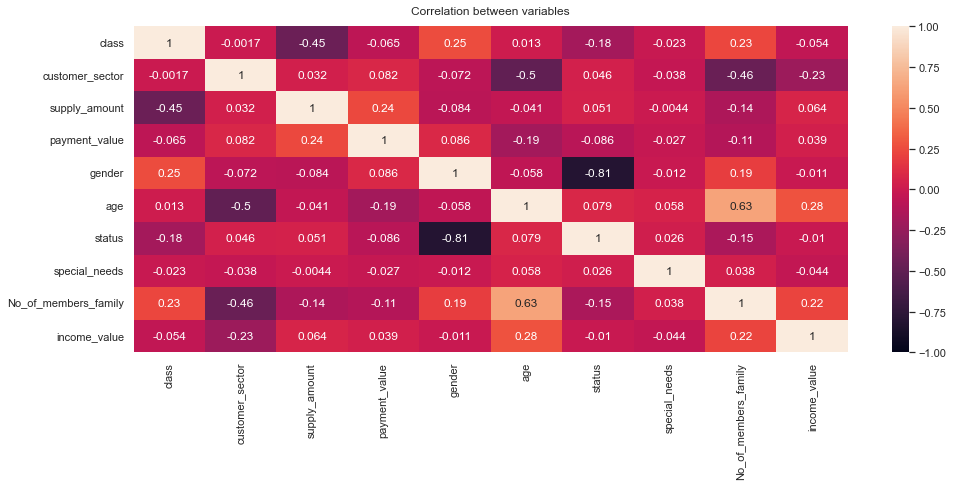

In [60]:
plt.figure(figsize=(16, 6)) # set size 
# visualize corr 
g = sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
# get title 
g.set_title('Correlation between variables', fontdict={'fontsize':12}, pad=12)

In [61]:
#detecting outliers 

# q1 get the first quantile 
q1=data['supply_amount'].quantile(0.25)

#q3 get the theird quantile 
q3=data['supply_amount'].quantile(0.75)

# If a data point is 1.5xIQR less the first quartile (Q1) then it is an outlier.
out_lower = q1 - 1.5*(q3 - q1)

# or 1.5xIQR above the third quartile (Q3) then it is an outlier.
out_upper = q3 + 1.5*(q3 - q1)

print("25th quantile of supply amount : {}".format(q1) + ' and ' + 'lower outlier limit : {} '. format(out_lower))

print("75th quantile of supply amount : {}".format(q3) + ' and ' + 'lower outlier limit : {} '. format(out_upper))



25th quantile of supply amount : 54000.0 and lower outlier limit : 45000.0 
75th quantile of supply amount : 60000.0 and lower outlier limit : 69000.0 


In [62]:
out_lowValue = data['supply_amount'][data['supply_amount'] < out_lower].count()
out_upValue = data['supply_amount'][data['supply_amount'] > out_upper].count()
print("count of lower outliers:", out_lowValue)
print("count of upper outliers :", out_upValue)
print("total outliers:", out_upValue + out_lowValue)

count of lower outliers: 4804
count of upper outliers : 275
total outliers: 5079


<Figure size 864x576 with 0 Axes>

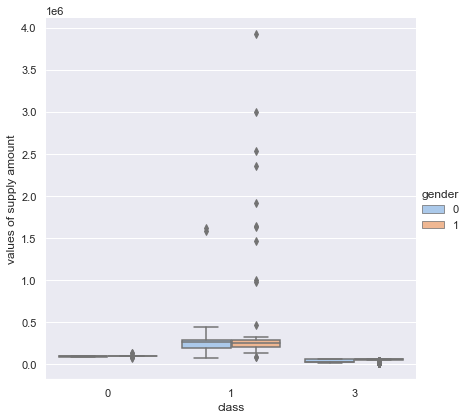

In [63]:
# visulation outliers supply amount for each class by gender 

plt.figure(figsize=(12,8))

g = sns.factorplot(x="class", y="supply_amount", hue="gender", data=data,
                   size=6, kind="box", palette="pastel")
g.despine(left=True)
g = g.set_ylabels("values of supply amount")

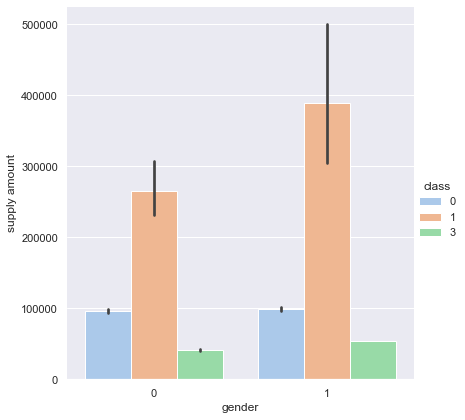

In [64]:
# explore bar plot of  x axis = gender vs  y axis = supply amount by class
g = sns.factorplot(x="gender", y="supply_amount", hue="class", data=data,
                   size=6, kind="bar", palette="pastel")
g.despine(left=True)
g = g.set_ylabels("supply amount")

In [65]:
Fdata = data.loc[data['gender']== 0, 'supply_amount'] # get a col(supply amount) based on gender == female(0)

In [66]:
Fdata

2        1585000.0
5          97230.0
101        73500.0
117       265000.0
150       296000.0
           ...    
54189      30000.0
54197      30000.0
54235      60000.0
54368      42000.0
54428      30000.0
Name: supply_amount, Length: 571, dtype: float64

In [67]:
Mdata = data.loc[data['gender']== 1, 'supply_amount'] # get a col(supply amount) based on gender == male (1)

In [68]:
Mdata.head()

3       97230.0
4       97230.0
6     1000000.0
12      97230.0
21    2533000.0
Name: supply_amount, dtype: float64

In [69]:
supply_gender = ({'male supply amount': Mdata,'female supply amount': Fdata}) # get supgroup as dataframe has two cols. 
supply_gender = pd.DataFrame(supply_gender)
print(supply_gender)

       male supply amount  female supply amount
2                     NaN             1585000.0
3                 97230.0                   NaN
4                 97230.0                   NaN
5                     NaN               97230.0
6               1000000.0                   NaN
...                   ...                   ...
55113             42000.0                   NaN
55116             42000.0                   NaN
55117             60000.0                   NaN
55120             60000.0                   NaN
55122             60000.0                   NaN

[23145 rows x 2 columns]


In [70]:
print( 'lenth of female supply amount : {}'.format(len(supply_gender['female supply amount'])) ) 
print("#"*30)
print( 'lenth of male supply amount : {}'.format(len(supply_gender['male supply amount']))) 


lenth of female supply amount : 23145
##############################
lenth of male supply amount : 23145


In [71]:
supply_gender.isnull().sum()

male supply amount        571
female supply amount    22574
dtype: int64

In [72]:
#visualite highlight of max, min and null values
supply_gender.style.highlight_max(color='pink').highlight_min(color ='lawngreen').highlight_null() 

In [73]:
#replace NAN value with median value of col.
supply_gender['male supply amount'].fillna(supply_gender['male supply amount'].median(), inplace=True)
# replace NAN value with median value of col.
supply_gender['female supply amount'].fillna(supply_gender['female supply amount'].median(), inplace=True)
print(supply_gender)

       male supply amount  female supply amount
2                 60000.0             1585000.0
3                 97230.0               54000.0
4                 97230.0               54000.0
5                 60000.0               97230.0
6               1000000.0               54000.0
...                   ...                   ...
55113             42000.0               54000.0
55116             42000.0               54000.0
55117             60000.0               54000.0
55120             60000.0               54000.0
55122             60000.0               54000.0

[23145 rows x 2 columns]


## T- test two independent 

In [74]:
import scipy.stats as stats # import library
# to peforem t.test  ind. of two samples 

In [75]:
 tres = stats.ttest_ind(a = supply_gender['female supply amount'],b =  supply_gender['male supply amount'] )
    
 print(tres)


Ttest_indResult(statistic=-2.000614390763595, pvalue=0.04543979116231453)


In [76]:

print(' P-value = {} is less than \u03B1 = 0.05 , then there difference between means of two samples (female supply , male supply)'.format(tres.pvalue.round(3)) )

 P-value = 0.045 is less than α = 0.05 , then there difference between means of two samples (female supply , male supply)


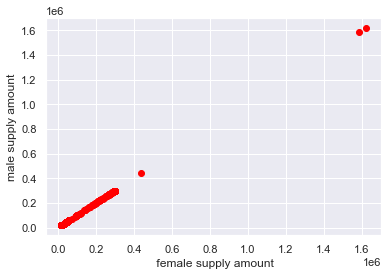

In [77]:
plt.scatter(supply_gender['female supply amount'],supply_gender['female supply amount'], c = "red") # to graph scatter plot

#set label of axises 
plt.xlabel(" female supply amount")
plt.ylabel("male supply amount")
plt.show() # to show plot 

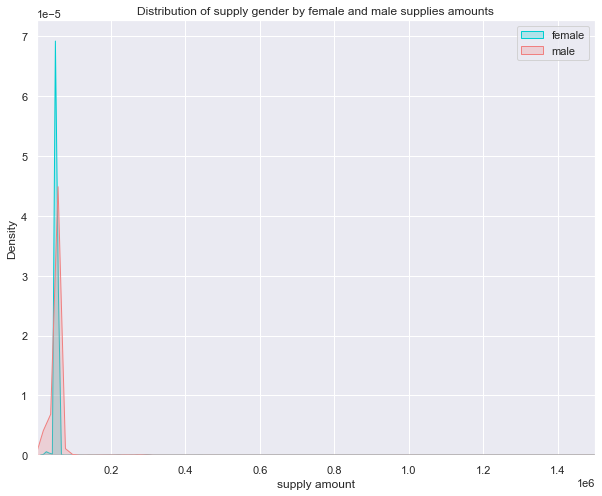

In [78]:
plt.figure(figsize=(10,8))
ax = sns.kdeplot(supply_gender["female supply amount"], color="darkturquoise", shade=True, label = 'female')
sns.kdeplot(supply_gender["male supply amount"], color="lightcoral", shade=True, label = 'male')
plt.legend()
plt.title('Distribution of supply gender by female and male supplies amounts')
ax.set(xlabel='supply amount')
plt.xlim(1000,1500000)
plt.show()

## Linear Regrission 

In [79]:
x = data.drop(['supply_amount','Region'], axis = 1) # set x variable 

In [80]:
y = data['supply_amount'] # set y as  dependet variable

In [81]:
print("X shape  = ",x.shape,"\n y shape =", y.shape) # to show dimntion of vairables 

X shape  =  (23145, 9) 
 y shape = (23145,)


In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42) # split dataset into test and train

In [83]:
print("x_train shape = {} ".format(x_train.shape)+ 'and ' + 'x_test = {}'.format( x_test.shape))
print("y_train = {} ".format(y_train.shape)+ 'and ' + 'y_test = {}' .format(y_test.shape))


x_train shape = (16201, 9) and x_test = (6944, 9)
y_train = (16201,) and y_test = (6944,)


In [84]:
lr = LinearRegression() 

In [85]:
lr.fit(x_train, y_train)

LinearRegression()

In [86]:
lr.coef_ # coefficient of linear regresssion 

array([-92293.09690447,   1912.70711107,  24309.04477561,  11093.04949102,
         2187.60154355,   2351.98992387,  -1456.85032716,  -4046.16716489,
         1967.94063461])

In [87]:
pd.DataFrame(lr.coef_.round(2), x.columns, columns=['Coefficients'])

Coefficients
class                    -92293.10
customer_sector            1912.71
payment_value             24309.04
gender                    11093.05
age                        2187.60
status                     2351.99
special_needs             -1456.85
No_of_members_family      -4046.17
income_value               1967.94

In [88]:
y_pred = lr.predict(x_test) # get predction value of linear model

In [89]:
y_residual = y_test - y_pred 

Text(0.5, 1.0, ' Risdual histgram of supply amount ')

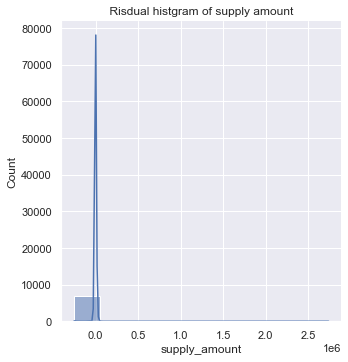

In [90]:

sns.displot(y_residual, bins= 10, kde=True) # display histgrom of residual 
plt.title(' Risdual histgram of supply amount ')


## Logistic Regression 

In [91]:
x = data.drop(['class','Region'],axis= 1) # set x with all cols. expect class and region

In [92]:
x.head()

customer_sector  supply_amount  payment_value  gender  age  status  \
2                2      1585000.0              1       0    2       1   
3                1        97230.0              1       1    2       0   
4                1        97230.0              1       1    0       1   
5                1        97230.0              1       0    1       2   
6                1      1000000.0              1       1    2       0   

   special_needs  No_of_members_family  income_value  
2              0                     0             3  
3              0                     0             0  
4              0                     0             0  
5              0                     1             0  
6              0                     0             3

In [93]:
y = data['class'] # set y as data with only one col (class)

In [94]:
y.head()

2    1
3    0
4    0
5    0
6    1
Name: class, dtype: int64

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [96]:
print("x_train shape = {} ".format(x_train.shape)+ 'and ' + 'x_test = {}'.format( x_test.shape))
print("y_train = {} ".format(y_train.shape)+ 'and ' + 'y_test = {}' .format(y_test.shape))


x_train shape = (16201, 9) and x_test = (6944, 9)
y_train = (16201,) and y_test = (6944,)


In [97]:
# import library to apply logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

In [98]:
log = LogisticRegression(multi_class='multinomial') 

In [99]:
log.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [100]:
log.score(x_train,y_train)

0.9979630886982285

In [101]:
log.score(x_test,y_test)

0.9981278801843319

In [102]:
y_pred = log.predict(x_test) 

In [103]:
y_residual = y_test - y_pred

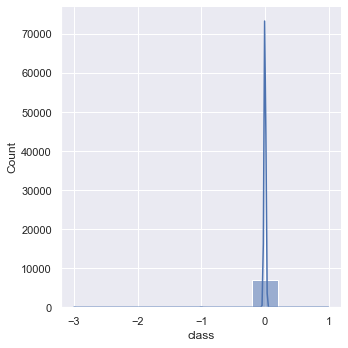

In [104]:
sns.displot(y_residual, bins=10, kde=True)

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.27      0.40        15
           1       0.89      0.97      0.93        58
           3       1.00      1.00      1.00      6871

    accuracy                           1.00      6944
   macro avg       0.90      0.74      0.78      6944
weighted avg       1.00      1.00      1.00      6944

